<center>
    <h1>BÀI THỰC HÀNH 2: MÔ HÌNH HỒI QUY (PHẦN 2)</h1>
</center>
<br>
<h4>Bài tập 2: Cài đặt hồi quy đa thức bằng tay.</h4>

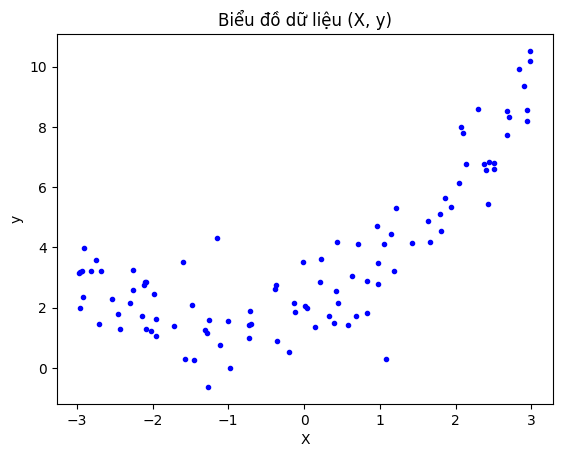

In [1]:
#Các bước tương tự bài 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures#chuyển giá trị trong X và X_new về thành dạng bậc 2 
from sklearn.linear_model import LinearRegression

# Khởi tạo dữ liệu huấn luyện
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Thêm giá trị bias_term vào dữ liệu X ban đầu
X_b = np.c_[np.ones((100, 1)), X]

# Vẽ biểu đồ
plt.plot(X, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Biểu đồ dữ liệu (X, y)")
plt.show()

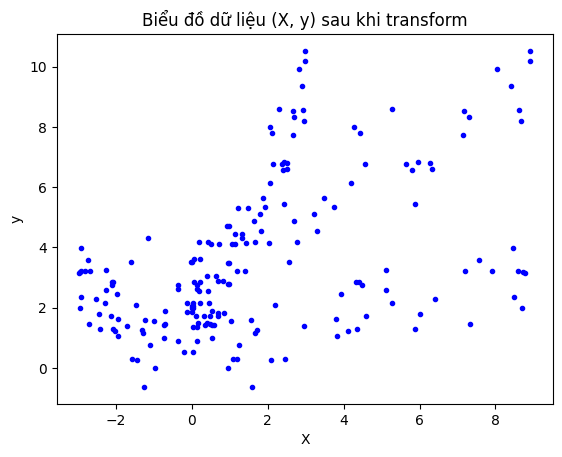

In [2]:
#Dữ liệu dự đoán
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

#Transform X
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_new_poly = poly_features.fit_transform(X_new)
plt.plot(X_poly, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Biểu đồ dữ liệu (X, y) sau khi transform")
plt.show()

In [3]:
theta_best = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

y_pred = np.dot(X_new_poly,theta_best)

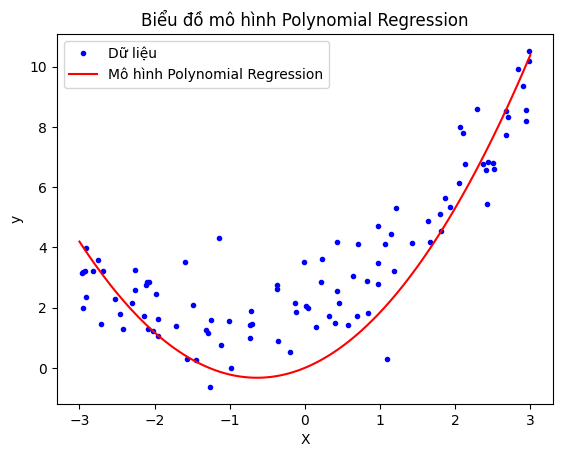

In [4]:
plt.plot(X, y, "b.", label="Dữ liệu")
plt.legend(loc="upper left")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_new, y_pred, "r-", label="Mô hình Polynomial Regression")
plt.legend(loc="upper left")
plt.title("Biểu đồ mô hình Polynomial Regression")
plt.show()

***

<h3>Bài tập 3. Xây dựng mô hình hồi quy Ridge. </h3>

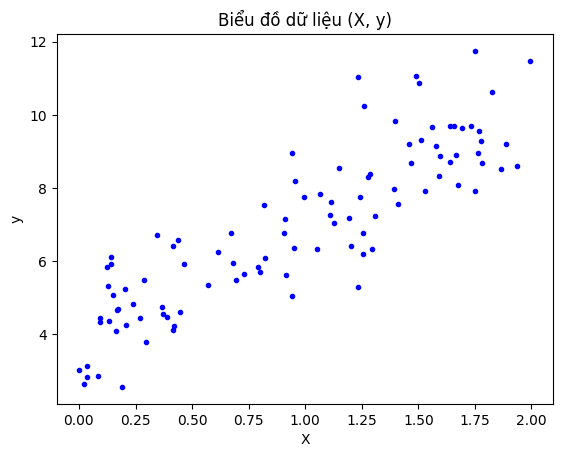

In [5]:
#Phần này tương tự bài 1
#cau 1
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo dữ liệu
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Thêm giá trị bias_term vào dữ liệu X ban đầu
X_b = np.c_[np.ones((100, 1)), X]

# Vẽ biểu đồ
plt.plot(X, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Biểu đồ dữ liệu (X, y)")
plt.show()

In [6]:
alpha = 0.02
theta_best = np.linalg.inv(X_b.T.dot(X_b) + alpha * np.identity(2)).dot(X_b.T.dot(y))

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
theta_best

array([[3.86883189],
       [3.2056726 ]])

In [7]:
y_pred = np.dot(X_new_b,theta_best)

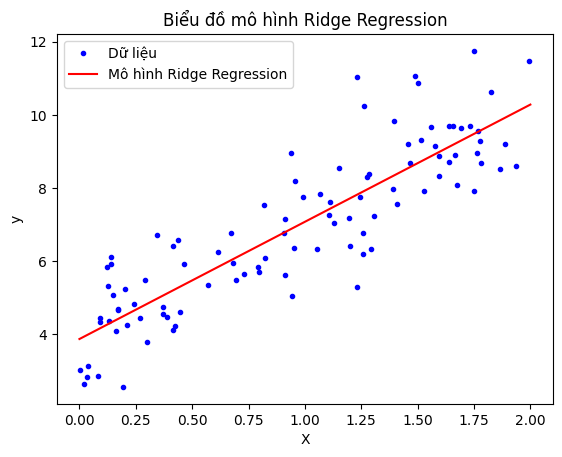

In [8]:
plt.plot(X, y, "b.", label="Dữ liệu")
plt.legend(loc="upper left")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_new, y_pred, "r-",label="Mô hình Ridge Regression")
plt.legend(loc="upper left")
plt.title("Biểu đồ mô hình Ridge Regression")
plt.show()

<h3>Bài tập 4</h3>

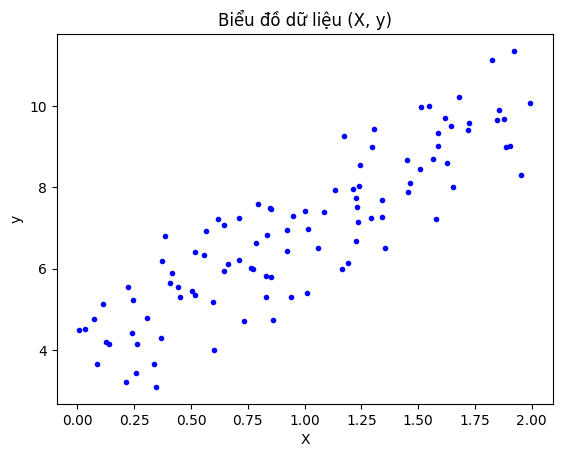

In [9]:
#Phần này tương tự bài 1
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo dữ liệu
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Thêm giá trị bias_term vào dữ liệu X ban đầu
X_b = np.c_[np.ones((100, 1)), X]

# Vẽ biểu đồ
plt.plot(X, y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Biểu đồ dữ liệu (X, y)")
plt.show()

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best_l = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#tính toán hệ số của mô hình hồi quy tuyến tính 

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred_l = X_new_b.dot(theta_best_l)
theta_best_l 

array([[3.91995928],
       [3.07562334]])

In [12]:
#sử dụng thư viện scikit-learn để thực hiện hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
y_sklearn_pred_l = lin_reg.predict(X_new)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([3.91995928]), array([[3.07562334]]))

In [14]:
# Chuyển hệ số chặn intercept_ thành một ma trận hai chiều
intercept_matrix = np.array([lin_reg.intercept_])

theta_best_l_sklearn = np.concatenate((intercept_matrix, lin_reg.coef_), axis=0)
theta_best_l_sklearn

array([[3.91995928],
       [3.07562334]])

In [15]:
theta_best_l

array([[3.91995928],
       [3.07562334]])

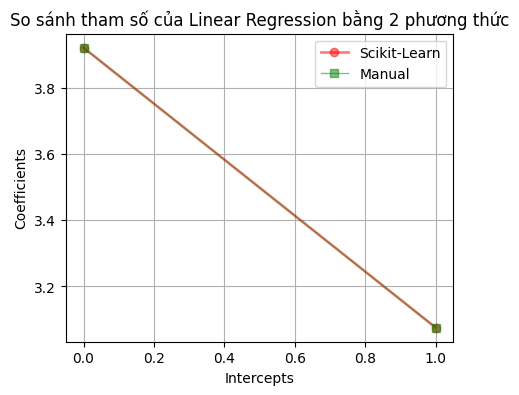

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 4))
plt.plot(theta_best_l_sklearn, label="Scikit-Learn",  color="red", linewidth=2, marker="o", alpha=0.5)
plt.plot(theta_best_l, label="Manual",color="green", linewidth=1, marker="s", alpha=0.5)


plt.xlabel("Intercepts")
plt.ylabel("Coefficients")
plt.legend()
plt.title("So sánh tham số của Linear Regression bằng 2 phương thức")

# Sử dụng seaborn để làm đẹp biểu đồ
sns.set
plt.grid()
plt.show()

>Ta thấy cả hai cách tính hệ số đều cho kết quả tương tự,2 đường trùng nhau, nhưng thư viện scikit-learn giúp bạn thực hiện hồi quy tuyến tính một cách thuận tiện và hiệu quả hơn trong nhiều trường hợp.*--

---

<center>
    <h1>BÀI THỰC HÀNH 4: MÔ HÌNH HỒI QUY (Phần 3)</h1>
</center>
<br>
<h3>1. ĐỌC DỮ LIỆU</h3>
<h4>Bộ dữ liệu: California Housing Price.</h4>

In [19]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
df = pd.read_csv("./housing.csv")

In [20]:
#10 du lieu dau tien cua bo data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


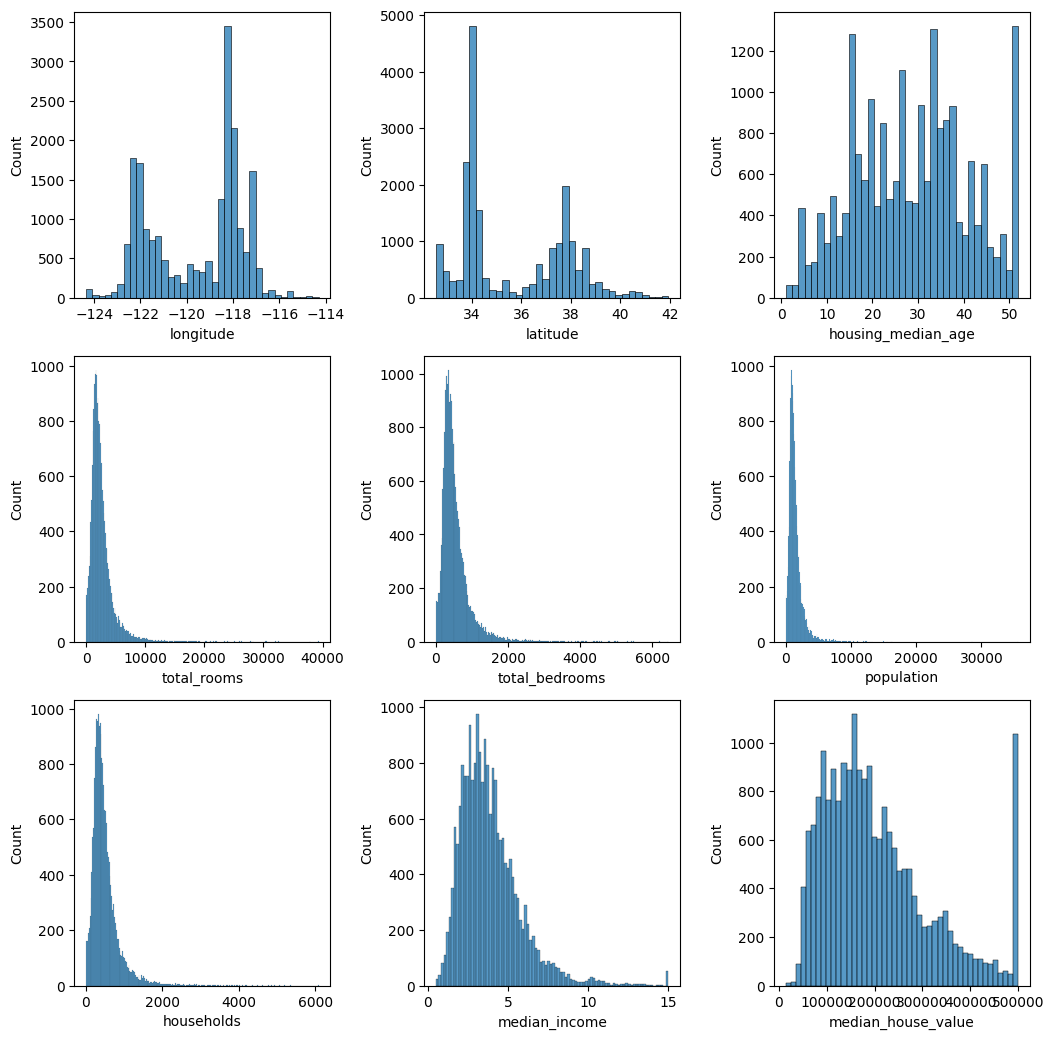

In [21]:
#Câu 1
#Thể hiện phân bố của thuộc tính giá nhà
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
# Vẽ histplot cho các thuộc tính numerical
n_rows=3
n_cols=3

fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))#tạo subplot cho các cột
 #vong for ve cho 9 box
for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=(r*n_cols)+c;
        if i < len(columns):
            ax_i=ax[r,c]
            sns.histplot(data=df[columns[i]],ax=ax_i)

plt.tight_layout() #dãn cách tiêu đề 



In [22]:
#cho biết khoảng min - max của biến mục tiêu (median_house_value) 
print(f"Min = ",df['median_house_value'].min())
print(f"Max = ",df['median_house_value'].max())

Min =  14999.0
Max =  500001.0


In [23]:
#Nhận xét:
print(f"Số lượng nhà có giá trị min: ",df['median_house_value'].value_counts()[df['median_house_value'].min()])
print(f"Số lượng nhà có giá trị max: ",df['median_house_value'].value_counts()[df['median_house_value'].max()])

Số lượng nhà có giá trị min:  4
Số lượng nhà có giá trị max:  965


In [24]:
#Câu 2:
# Số lượng dòng
num_rows = len(df)

# Số lượng thuộc tính (cột)
num_columns = len(df.columns)

print(f"Số lượng dòng: {num_rows}")
print(f"Số lượng thuộc tính (cột): {num_columns}")


Số lượng dòng: 20640
Số lượng thuộc tính (cột): 10


In [25]:
#các thuộc tính của  dataset
for col in columns:
    print(col)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [27]:
#Câu 3:
# Số lượng giá trị NA trong mỗi thuộc tính
na_counts = df.isnull().sum()

# In ra số lượng giá trị NA cho từng thuộc tính
print("Số lượng giá trị NA trong từng thuộc tính:")
print(na_counts)


Số lượng giá trị NA trong từng thuộc tính:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<h3> 2. CHUẨN BỊ DỮ LIỆU HUẤN LUYỆN</h3>

In [39]:
#Vẽ ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo code gợi ý
# hàm tìm những cột bị thiếu dữ liệu trong columns
def display_missing_data(df,columns):
    n_rows=df.shape[0]
    for col in columns:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")
display_missing_data(df,columns)

In [40]:
# Điền giá trị thiếu bằng giá trị trung bình (median)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Kiểm tra lại dữ liệu thiếu
display_missing_data(df, columns)


In [41]:
ocean_proximity_counts = df['ocean_proximity'].value_counts()
print(ocean_proximity_counts)


ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


<b> Transform data ocean_proximity </b>
- 0: <1H OCEAN - means less than one hour to sea
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

In [42]:
#LabelEncoder từ thư viện Scikit-Learn để biến đổi cột 'ocean_proximity' thành các số tương ứng
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

<Axes: >

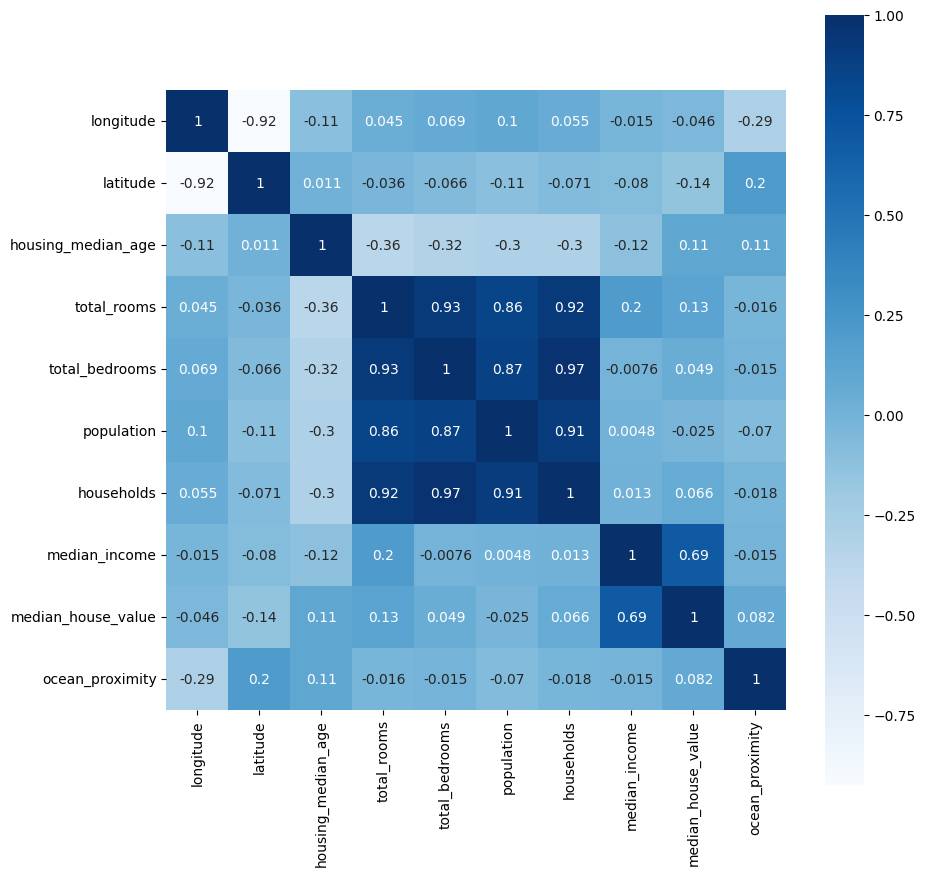

In [38]:
# Tinh su phu thuoc cua tung thuoc tinh
correlation = df.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

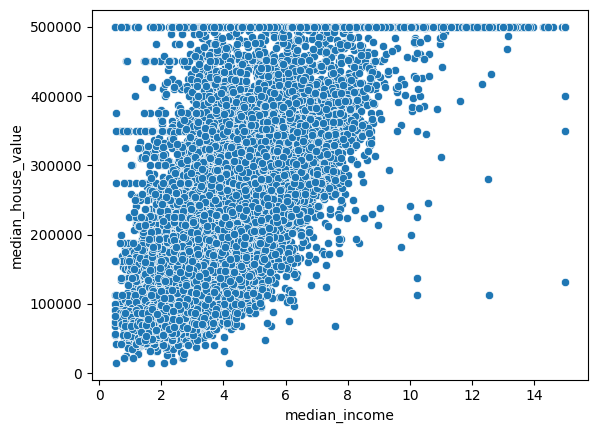

In [45]:
# Định nghĩa và gán dữ liệu cho biến X_train và y_train_transformed
X_train = df['median_income']  
y_train_transformed = df['median_house_value'] 

data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")
X = df['median_income']
y = df['median_house_value']

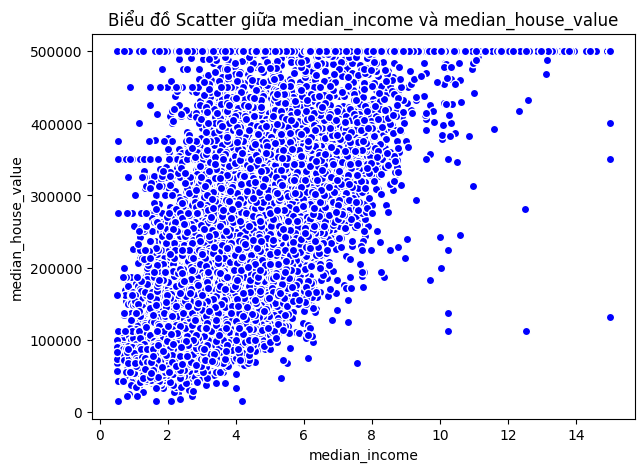

In [65]:
#Câu 5:
import matplotlib.pyplot as plt

# Dữ liệu
X = df['median_income']
y = df['median_house_value']

# Vẽ biểu đồ tán xạ
plt.figure(figsize=(7,5))
plt.scatter(X, y, c='b',edgecolors='w')
plt.title('Biểu đồ Scatter giữa median_income và median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()


In [66]:
#Câu 6:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Xem số chiều của tập huấn luyện và tập kiểm thử
print(f"Số chiều của tập huấn luyện: {X_train.shape}")
print(f"Số chiều của tập kiểm thử: {X_test.shape}")
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

Số chiều của tập huấn luyện: (16512,)
Số chiều của tập kiểm thử: (4128,)


<h3>3. HUẤN LUYỆN MÔ HÌNH VÀ KIỂM THỬ</h3>

In [69]:
#Câu 7:
#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [70]:
#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)
y_pred

array([22.20457732, 22.60808936, 10.95907555, ..., 21.6500405 ,
       16.34219733, 28.31710672])

In [72]:
# tính toán Mean Squared Error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_transformed, y_pred, squared = True)
print(f"MSE cho lần train này là: {round(MSE,4)}")


MSE cho lần train này là: 86.0317


<Axes: xlabel='median_income', ylabel='median_house_value'>

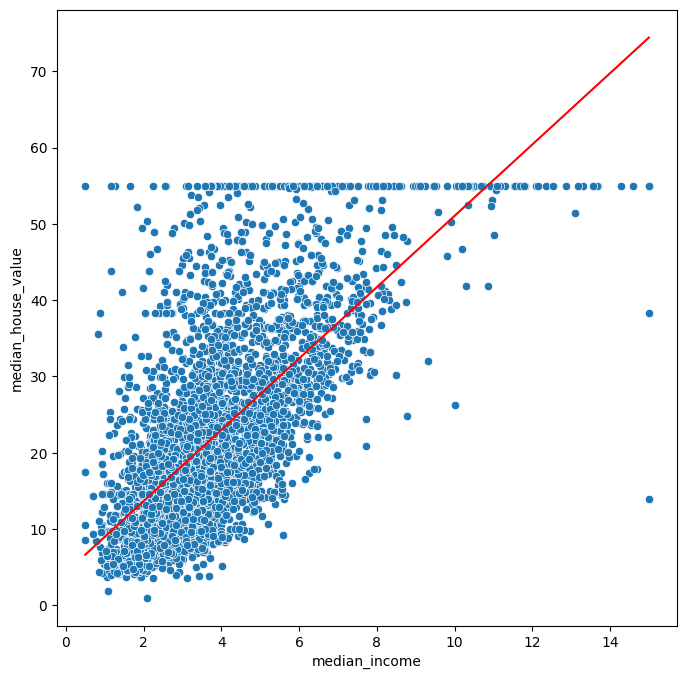

In [75]:
import seaborn as sns
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value",color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


<hr>
<center>END</center>
<hr>